In [8]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker
import mat73
import scipy.signal as sp
import time

os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory


from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (15,7)

In [44]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    #return A
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

In [11]:
inter = lumapi.INTERCONNECT(filename='hibrid.icp')

dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
0.5795150004357972

-2.573560060661547


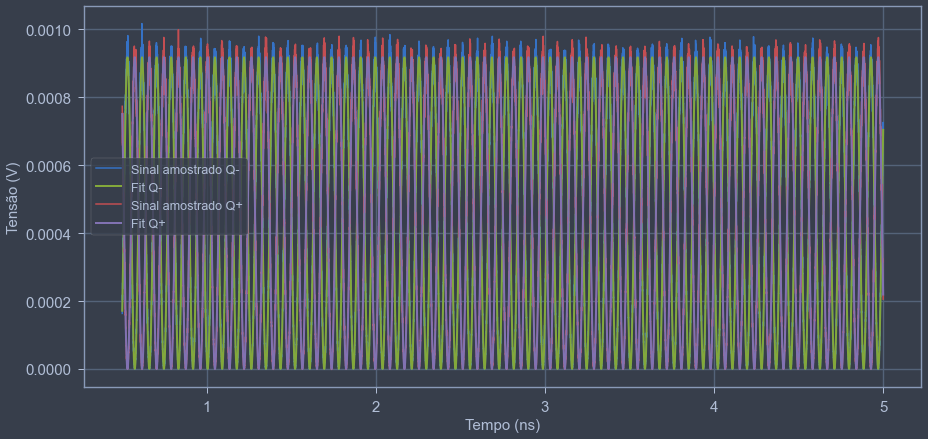

In [192]:
onda = inter.getresult('OSC_1','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q-')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q-')
print(fit['phase'])
print()
plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

onda = inter.getresult('OSC_2','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)

plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q+')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q+')
print(fit['phase'])
plt.legend()


dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
{'amp': -0.0004587743962834217, 'omega': 7540165038.929028, 'phase': -2.5294508560170406, 'offset': 0.00045895569594637094, 'freq': 1200054537.6742482, 'period': 8.332954616696325e-10, 'fitfunc': <function fit_sin.<locals>.<lambda> at 0x000001D989DFC280>, 'maxcov': 87052019459.67918, 'rawres': (array([4.57762912e-04, 6.98131701e+09, 0.00000000e+00, 4.43500402e-04]), array([-4.58774396e-04,  7.54016504e+09, -2.52945086e+00,  4.58955696e-04]), array([[ 3.14867948e-14,  5.88924930e-04, -2.58313432e-12,
        -1.03548966e-15],
       [ 5.88924930e-04,  8.70520195e+10, -2.44139451e+02,
         8.80570004e-04],
       [-2.58313432e-12, -2.44139451e+02,  8.33100727e-07,
        -5.49006700e-12],
       [-1.03548966e-15,  8.80570004e-04, -5.49006700e-12,
         1.57332085e-14]]))}

{'amp': 0.0004591555819201574, 'omega': 7539485451.620272, 'phase': -2.5388033983963907, 'offset': 0.0004590245262

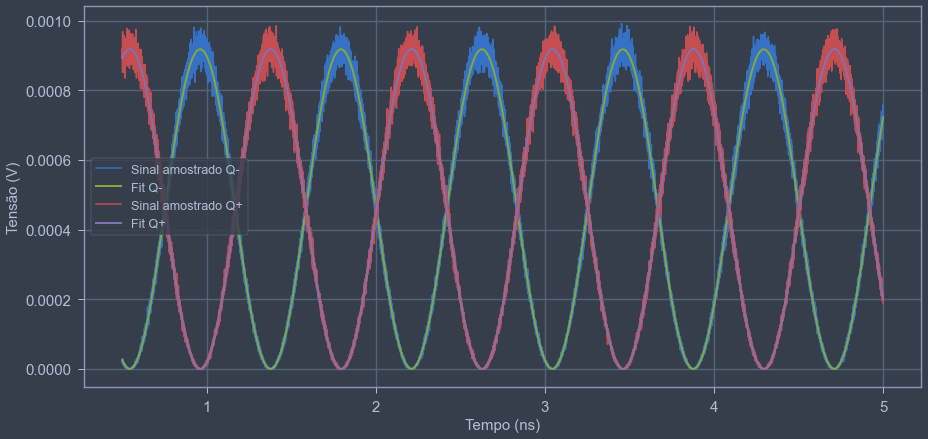

In [189]:
onda = inter.getresult('OSC_1','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q-')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q-')

fase = fit['phase']
print(fit)
print()
plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

onda = inter.getresult('OSC_2','signal')

fase = fit['phase']

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)

plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q+')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo + fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q+')

print(fit)
plt.legend()


dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
0.9991492099090838
dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
0.5269772498563241


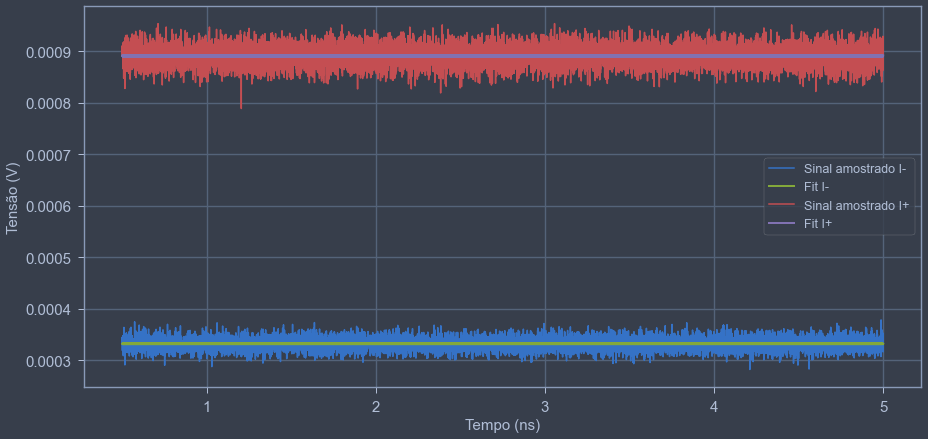

In [138]:
onda = inter.getresult('OSC_3','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I-')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo-fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I-')

plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

onda = inter.getresult('OSC_4','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I+')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo-fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I+')

plt.legend()


dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
-0.016823829987174625
dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])


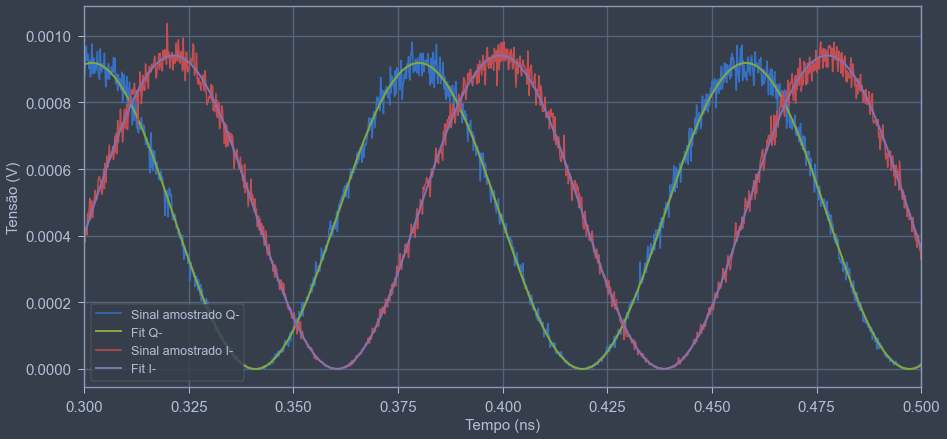

In [200]:
onda = inter.getresult('OSC_1','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q-')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q-')

plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

onda = inter.getresult('OSC_3','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I-')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I-')
plt.xlim(0.3,0.5)
plt.legend()


In [155]:
inter.setnamed('CWL_2','frequency',/1530)

In [206]:
freq = np.arange(1531,1532)
freqdif = np.linspace(0.01,0.1,10)
Phasedif = np.zeros([freq.size,freqdif.size])
passo = 1
for i in  range(freq.size):
    for j in range(freqdif.size):
        time.sleep(0.05)
        clear_output(wait=True)
        print('passo {} de {}'.format(passo,freq.size*freqdif.size))
        passo += 1
        inter.switchtolayout()
        inter.setnamed('CWL_1','frequency',2.99792458e+17/freq[i])
        inter.setnamed('CWL_2','frequency',2.99792458e+17/(freq[i]+freqdif[j]))
        inter.run()

        onda = inter.getresult('OSC_1','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit1 = fit_sin(tempo,sinal)

        onda = inter.getresult('OSC_2','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit2 = fit_sin(tempo,sinal)
        if (abs((fit1['phase'])-(fit2['phase']))<np.pi/4):
            Phasedif[i][j] = abs((fit1['phase'])-(fit2['phase'])) + np.pi
            print('i')
        else:
            Phasedif[i][j] = abs((fit1['phase'])-(fit2['phase']))
            print('o')
        

passo 10 de 10
o


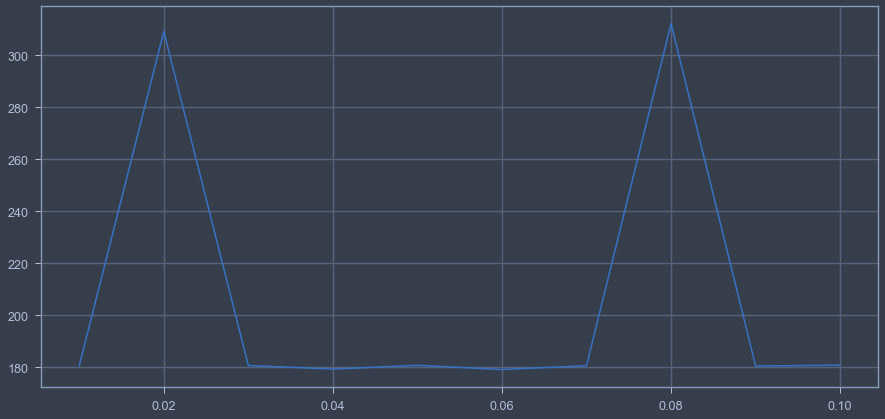

In [207]:
plt.plot(freqdif,Phasedif[0]*180/np.pi)